In [100]:
import matplotlib.pyplot as plt
import numpy as np
import json

In [101]:
filepath = 'res_GC_RandF_1000_kroA200.json'

In [102]:
with open(filepath) as json_data:
    d = json.load(json_data)
    json_data.close()

In [103]:
_, method_sign, pick_method, _, _ = filepath.split('_')

In [104]:
X = []
Y = []
for i in d['unordered nodes']:
    X.append(i['X'])
    Y.append(i['Y'])

In [105]:
option = "best order"
match method_sign:
    case "NN":
      method = "Najbliższy Sąsiad"
    case "GC":
      method = "Zachłanny Cykl"
    case "REG":
      method = "Żal"  
    case _:
      method = "unknown"
match option:
    case "best order":
        which_order = "Najlepszy cykl"
    case "worst order":
        which_order = "Najgorszy cykl"
    case _:
        which_order = "unknown"
match pick_method:
    case "RandC":
      pick = "losowe najbliższe węzły"
    case "RandF":
      pick = "losowe najdalsze węzły"
    case "Rand":
      pick = "losowe węzły"

In [106]:
cycle1 = d[option][0]
cycle2 = d[option][1]

In [107]:
f = lambda x: [X[x], Y[x]]

In [108]:
cycle_1 = []
for i in cycle1:
    cycle_1.append(f(i))
cycle_1.append(cycle_1[0])

In [109]:
cycle_2 = []
for i in cycle2:
    cycle_2.append(f(i))
cycle_2.append(cycle_2[0])

In [110]:
from numpy.linalg import norm
n = len(d['unordered nodes'])
distance_matrix = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        distance_matrix[i,j] = np.round(norm(np.array([d['unordered nodes'][i]["X"]-d['unordered nodes'][j]["X"],d['unordered nodes'][i]["Y"]-d['unordered nodes'][j]["Y"]])))
distance_matrix

array([[   0., 1700., 1846., ...,  452., 1163., 2616.],
       [1700.,    0., 1118., ..., 1250., 2651., 1504.],
       [1846., 1118.,    0., ..., 1536., 2320., 2615.],
       ...,
       [ 452., 1250., 1536., ...,    0., 1535., 2228.],
       [1163., 2651., 2320., ..., 1535.,    0., 3760.],
       [2616., 1504., 2615., ..., 2228., 3760.,    0.]], shape=(200, 200))

In [111]:
def cycle_length(cycle, distance_matrix):
    cost = 0
    for i in range(len(cycle)):
        cost += distance_matrix[cycle[i],cycle[(i+1)%len(cycle)]]
    return int(cost)

In [112]:
cycle1_color = "#99C24D"
cycle2_color = "#F18F01"

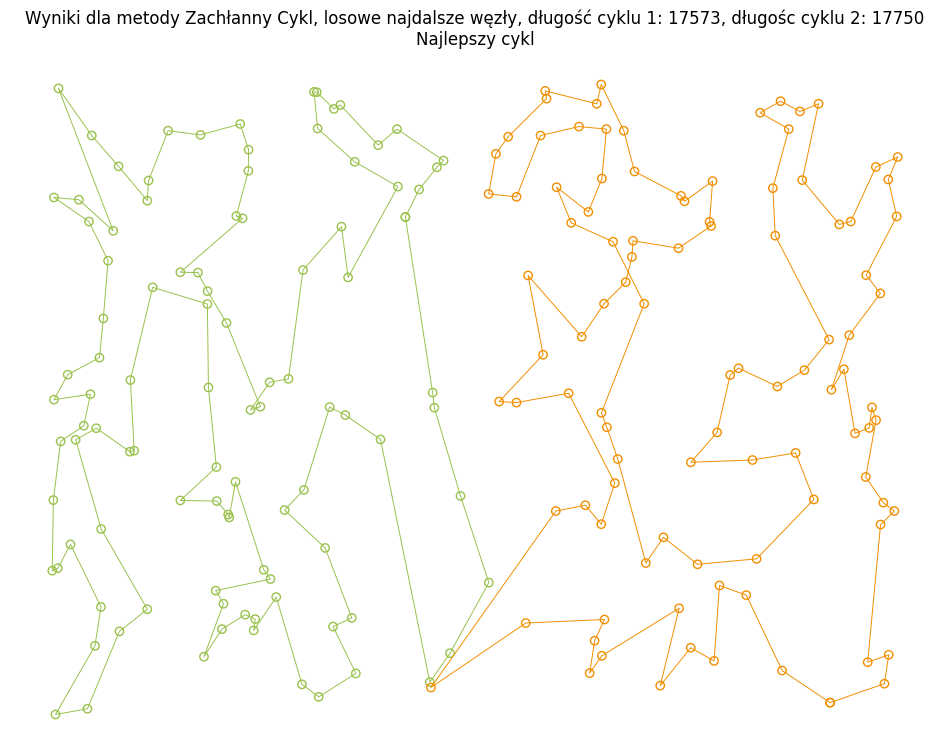

In [113]:
fig, ax = plt.subplots(figsize=(12,9))
plt.scatter(np.array(cycle_1).T[0],np.array(cycle_1).T[1], c="none", edgecolors=cycle1_color)
plt.scatter(np.array(cycle_2).T[0],np.array(cycle_2).T[1], c="none", edgecolors=cycle2_color)
plt.plot(np.array(cycle_1).T[0],np.array(cycle_1).T[1], c=cycle1_color, lw=0.7)
plt.plot(np.array(cycle_2).T[0],np.array(cycle_2).T[1], c=cycle2_color, lw=0.7)
plt.title(f"Wyniki dla metody {method}, {pick}, długość cyklu 1: {cycle_length(cycle1, distance_matrix)}, długośc cyklu 2: {cycle_length(cycle2, distance_matrix)}\n{which_order}")
nn = plt.axis(False)
fig.savefig(f"{method_sign}_{option}_{pick_method}.png",bbox_inches='tight', pad_inches=0.05)

In [114]:
cost_array = np.array(d['result'][0])+np.array(d['result'][1])

In [115]:
print(f"Najmniejsza długość łączna cykli: {np.min(cost_array)}")

Najmniejsza długość łączna cykli: 35323


In [116]:
print(f"Najdłuższa długość łączna cykli: {np.max(cost_array)}")

Najdłuższa długość łączna cykli: 41224


In [117]:
print(f"Średnia długość sumy cykli: {np.mean(cost_array)}")

Średnia długość sumy cykli: 38225.379
